In [1]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import re
import numpy as np
from bs4 import BeautifulSoup
from nltk.stem import WordNetLemmatizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

In [2]:
# Read data from CSV file
df = pd.read_csv("reddit_opinion_PSE_ISR.csv")

In [3]:
df = pd.read_csv("reddit_opinion_PSE_ISR.csv", skiprows=[220009])


In [4]:
df.sample(5)

,comment_id,score,self_text,subreddit,created_time,post_id,author_name,controversiality,ups,downs,...,user_link_karma,user_comment_karma,user_total_karma,post_score,post_self_text,post_title,post_upvote_ratio,post_thumbs_ups,post_total_awards_received,post_created_time
27213,ka2se2q,-5,Yet millions of jews moved to Palestine before...,IsraelPalestine,2023-11-20 22:26:19,17zqjov,anonymask_nfts,0,-5,0,...,1040.0,-57.0,1189.0,11,I know that this will not happen but just imag...,What would happen next if all Israelis would l...,0.62,11,0,2023-11-20 15:06:24
70821,k9nadp0,13,No terrorists operate out of the West Bank? Wo...,IsraelPalestine,2023-11-17 15:34:28,17xhcam,Berly653,0,13,0,...,23156.0,91192.0,115926.0,120,"""Don’t fall for Hamas propaganda. As a Lebanes...",Opinion of a Lebanese,0.85,120,0,2023-11-17 15:18:20
84357,k9hxnjn,1,I did call her a terrorist as well.\n\nShe pro...,IsraelPalestine,2023-11-16 13:27:04,17wk8dv,West-Incident-9040,0,1,0,...,460.0,1918.0,2438.0,0,I see many commenting and posting videos justi...,Do most zionists believe that getting rid of p...,0.32,0,0,2023-11-16 11:03:18
212420,k6yvkyz,54,What the f lol this is one of the biggest ones...,CombatFootage,2023-10-29 16:27:38,17j5zap,FunnyTerrorist,0,54,0,...,14229.0,22879.0,37252.0,4987,NaN,The bombing of the vicinity of Al-Azhar Univer...,0.95,4987,0,2023-10-29 15:59:28
158532,k8khnm4,4,"If society collapses to that extent, gold won'...",PublicFreakout,2023-11-09 22:55:33,17rkxrn,LunchyPete,0,4,0,...,17098.0,117983.0,136850.0,1600,NaN,Roseanne Barr screaming terroristic threats at...,0.81,1600,0,2023-11-09 19:30:45


In [79]:
df.size

48000

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232022 entries, 0 to 232021
Data columns (total 24 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   comment_id                  232022 non-null  object 
 1   score                       232022 non-null  int64  
 2   self_text                   232021 non-null  object 
 3   subreddit                   232022 non-null  object 
 4   created_time                232022 non-null  object 
 5   post_id                     232022 non-null  object 
 6   author_name                 232022 non-null  object 
 7   controversiality            232022 non-null  int64  
 8   ups                         232022 non-null  int64  
 9   downs                       232022 non-null  int64  
 10  user_is_verified            228209 non-null  object 
 11  user_account_created_time   228209 non-null  object 
 12  user_awardee_karma          232018 non-null  float64
 13  user_awarder_k

In [6]:
for i in range(10):
    print(df.self_text[i])

Actually my family has been in Israel for 600 years so be quite
Does anyone doubt that Iran WILL nuke Israel when their bomb is operational?  After all, it is their greatest aspiration on earth.  The grand prize is seventy-two virgins in blissful ecstasy.  Who could resist?

Clearly, the mullahs don't care about existentialism because their future is in the hands of Allah.  WW III sounds like fun to them because it will kill countless infidels.

World War III isn't likely to start with a single nuke.  If Israel nukes Iran, the other nuclear powers will have a "come to Jesus" meeting where they will have to decide whether Iran is their problem and whether they are willing to go down with them.   I highly suspect that, at the end of the day, none of Iran's friends are willing to follow them to hell.  Russia, China, India, and Pakistan all know that nothing will stop their total destruction should they choose to participate in Iran's insane initiatives.  Each of them will have to decide i

In [7]:
import zipfile
import os

#zip_file_path = "C:\Users\radha\Downloads\wordnet.zip"
zip_file_path = r"/Users/Amisha/Downloads/wordnet.zip"

destination_directory = '/Users/Amisha/nltk_data'

# Check if the specific file exists in the destination directory
file_to_check = 'index.adv'
file_path_to_check = os.path.join(destination_directory, 'wordnet', file_to_check)

if not os.path.exists(file_path_to_check):
    # Unzip the entire archive if the specific file doesn't exist
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        zip_ref.extractall(destination_directory)
    print(f"Successfully unzipped {zip_file_path} to {destination_directory}")
else:
    print(f"File {file_to_check} already exists. No need to unzip the archive.")

File index.adv already exists. No need to unzip the archive.


In [8]:
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/Amisha/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [9]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /Users/Amisha/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [10]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /Users/Amisha/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [11]:
import nltk
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /Users/Amisha/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [12]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from bs4 import BeautifulSoup
import re

# Initialize the lemmatizer and stopwords
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def clean_text(text):
    # Check if the input is a valid string
    if isinstance(text, str):
        # Remove URLs
        text = re.sub(r'http\S+', '', text)

        # Remove HTML tags
        soup = BeautifulSoup(text, 'html.parser')
        text = soup.get_text()

        # Remove special characters and lowercase the text
        text = re.sub(r'[^a-zA-Z0-9\s]', '', text).lower()

        # Tokenization
        tokens = word_tokenize(text)

        # Lemmatization and removing stopwords
        tokens = [lemmatizer.lemmatize(token) for token in tokens if token not in stop_words]

        # Join the tokens back into a sentence
        cleaned_text = ' '.join(tokens)

        return cleaned_text
    else:
        # If the input is not a string, return an empty string or handle it according to your needs
        return ''

# Example usage on 'self_text' column of your DataFrame
df['clean_text'] = df['self_text'].apply(clean_text)


/tmp/ipykernel_21971/369728380.py:18: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, 'html.parser')


In [13]:
for i in range(10):
    print(df.clean_text[i])


actually family israel 600 year quite
anyone doubt iran nuke israel bomb operational greatest aspiration earth grand prize seventytwo virgin blissful ecstasy could resist clearly mullah dont care existentialism future hand allah ww iii sound like fun kill countless infidel world war iii isnt likely start single nuke israel nuke iran nuclear power come jesus meeting decide whether iran problem whether willing go highly suspect end day none iran friend willing follow hell russia china india pakistan know nothing stop total destruction choose participate iran insane initiative decide ww iii preferable nothing nope far easier complain meanwhile problem nuke supposed solve likely remediated recipient warfare definitely reconsider option worked japan work iran well give chance lot country misbehave get away repeatedly none country business human right dont weigh definition isnt universal human right arent thing culture human right nuclear power appreciate continued existence concept mutually

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232022 entries, 0 to 232021
Data columns (total 25 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   comment_id                  232022 non-null  object 
 1   score                       232022 non-null  int64  
 2   self_text                   232021 non-null  object 
 3   subreddit                   232022 non-null  object 
 4   created_time                232022 non-null  object 
 5   post_id                     232022 non-null  object 
 6   author_name                 232022 non-null  object 
 7   controversiality            232022 non-null  int64  
 8   ups                         232022 non-null  int64  
 9   downs                       232022 non-null  int64  
 10  user_is_verified            228209 non-null  object 
 11  user_account_created_time   228209 non-null  object 
 12  user_awardee_karma          232018 non-null  float64
 13  user_awarder_k

VADER Sentiment Analysis

In [15]:
# Initialize the Sentiment Intensity Analyzer
analyzer = SentimentIntensityAnalyzer()

# Declare variables for scores
scores = {
    "Compound": [],
    "Positive": [],
    "Negative": [],
    "Neutral": []
}

# Generate sentiment scores for Reddit comments
for comment in df['clean_text']:
    compound = analyzer.polarity_scores(comment)["compound"]
    pos = analyzer.polarity_scores(comment)["pos"]
    neu = analyzer.polarity_scores(comment)["neu"]
    neg = analyzer.polarity_scores(comment)["neg"]

    scores["Compound"].append(compound)
    scores["Positive"].append(pos)
    scores["Negative"].append(neg)
    scores["Neutral"].append(neu)

# Create a new DataFrame for sentiment scores
sentiments_score = pd.DataFrame(scores)

# Join the sentiment scores DataFrame with the original DataFrame
df = pd.concat([df, sentiments_score], axis=1)

In [16]:
df.head()

,comment_id,score,self_text,subreddit,created_time,post_id,author_name,controversiality,ups,downs,...,post_title,post_upvote_ratio,post_thumbs_ups,post_total_awards_received,post_created_time,clean_text,Compound,Positive,Negative,Neutral
0,kadcby5,1,Actually my family has been in Israel for 600 ...,IsraelPalestine,2023-11-22 23:43:09,1815xgm,BridgeThink4214,0,1,0,...,"Why did my friend say “that’s funny, because P...",0.79,189,0,2023-11-22 10:15:09,actually family israel 600 year quite,0.0000,0.000,0.000,1.000
1,kadcasl,1,Does anyone doubt that Iran WILL nuke Israel w...,IsraelPalestine,2023-11-22 23:42:55,181kiqb,Device_whisperer,0,1,0,...,Does anyone doubt...,0.50,0,0,2023-11-22 21:39:48,anyone doubt iran nuke israel bomb operational...,0.0219,0.214,0.210,0.576
2,kadcas8,1,Cool. Please stop massacring civilians.,CombatFootage,2023-11-22 23:42:55,181md5j,bauN7,0,1,0,...,Inside Hamas' tunnels under Al Shifa Hospital ...,0.72,24,0,2023-11-22 22:57:52,cool please stop massacring civilian,0.3400,0.523,0.250,0.227
3,kadcanw,1,the only ethnic cleansing that has ever take p...,IsraelPalestine,2023-11-22 23:42:54,180tveu,Andromeda_Skye,0,1,0,...,Should Palestinians be angry with the Arab wor...,0.77,94,0,2023-11-21 22:46:06,ethnic cleansing ever take place israel israel...,-0.8957,0.081,0.100,0.819
4,kadca8g,1,I mean yeah it was fairly obvious Israel is ca...,AskMiddleEast,2023-11-22 23:42:48,181l92n,mkbilli,0,1,0,...,History of Israeli sexual assault against Pale...,1.00,11,0,2023-11-22 22:10:10,mean yeah fairly obvious israel carrying human...,-0.7579,0.071,0.282,0.647


In [17]:
# Define conditions for sentiment categories based on 'Compound' scores
# If Compound score is <= -0.5, classify as 'Negative'
# If Compound score is > -0.5 and < 0.5, classify as 'Neutral'
# If Compound score is >= 0.5, classify as 'Positive'
conditions = [
    (df['Compound'] <= -0.5),
    (df['Compound'] > -0.5) & (df['Compound'] < 0.5),
    (df['Compound'] > 0.5)
]

# Define corresponding values for each condition
values = ['Negative', 'Neutral', 'Positive']

# Create a new column 'Category' using np.select to assign values based on the conditions
df['Category'] = np.select(conditions, values)

In [18]:
df.head()

,comment_id,score,self_text,subreddit,created_time,post_id,author_name,controversiality,ups,downs,...,post_upvote_ratio,post_thumbs_ups,post_total_awards_received,post_created_time,clean_text,Compound,Positive,Negative,Neutral,Category
0,kadcby5,1,Actually my family has been in Israel for 600 ...,IsraelPalestine,2023-11-22 23:43:09,1815xgm,BridgeThink4214,0,1,0,...,0.79,189,0,2023-11-22 10:15:09,actually family israel 600 year quite,0.0000,0.000,0.000,1.000,Neutral
1,kadcasl,1,Does anyone doubt that Iran WILL nuke Israel w...,IsraelPalestine,2023-11-22 23:42:55,181kiqb,Device_whisperer,0,1,0,...,0.50,0,0,2023-11-22 21:39:48,anyone doubt iran nuke israel bomb operational...,0.0219,0.214,0.210,0.576,Neutral
2,kadcas8,1,Cool. Please stop massacring civilians.,CombatFootage,2023-11-22 23:42:55,181md5j,bauN7,0,1,0,...,0.72,24,0,2023-11-22 22:57:52,cool please stop massacring civilian,0.3400,0.523,0.250,0.227,Neutral
3,kadcanw,1,the only ethnic cleansing that has ever take p...,IsraelPalestine,2023-11-22 23:42:54,180tveu,Andromeda_Skye,0,1,0,...,0.77,94,0,2023-11-21 22:46:06,ethnic cleansing ever take place israel israel...,-0.8957,0.081,0.100,0.819,Negative
4,kadca8g,1,I mean yeah it was fairly obvious Israel is ca...,AskMiddleEast,2023-11-22 23:42:48,181l92n,mkbilli,0,1,0,...,1.00,11,0,2023-11-22 22:10:10,mean yeah fairly obvious israel carrying human...,-0.7579,0.071,0.282,0.647,Negative


# Overall Sentiment Analysis

In [19]:
x = sum(df["Positive"])
y = sum(df["Negative"])
z = sum(df["Neutral"])

def sentiment_score(a, b, c):
    if (a>b) and (a>c):
        return "Positive 😊"
    elif (b>a) and (b>c):
        return "Negative 😠"
    else:
        return "Neutral 🙂"
        
print(sentiment_score(x, y, z))

Neutral 🙂


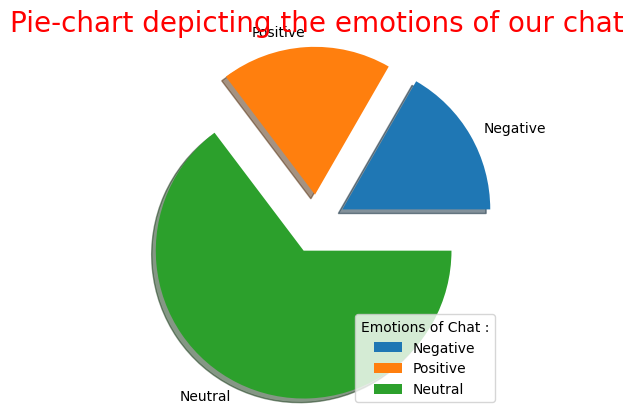

<Figure size 1600x2000 with 0 Axes>

In [20]:
import matplotlib.pyplot as plt
import numpy as np

y = np.array([x,y,z])
mylabels = ["Negative", "Positive", "Neutral"]

myexplode = [0.2, 0.2, 0.2]

plt.pie(y, labels = mylabels, explode = myexplode, shadow = True, center=(0,0))
plt.legend(title="Emotions of Chat :",loc='lower right')
plt.title('Pie-chart depicting the emotions of our chat',loc='center',color='r',fontsize=20)
plt.figure(figsize=(16,20))
plt.show()

In [21]:
#importing libraries
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/Amisha/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/Amisha/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [22]:
data1=df.loc[df['controversiality'] ==0]

In [23]:
data1.head()

,comment_id,score,self_text,subreddit,created_time,post_id,author_name,controversiality,ups,downs,...,post_upvote_ratio,post_thumbs_ups,post_total_awards_received,post_created_time,clean_text,Compound,Positive,Negative,Neutral,Category
0,kadcby5,1,Actually my family has been in Israel for 600 ...,IsraelPalestine,2023-11-22 23:43:09,1815xgm,BridgeThink4214,0,1,0,...,0.79,189,0,2023-11-22 10:15:09,actually family israel 600 year quite,0.0000,0.000,0.000,1.000,Neutral
1,kadcasl,1,Does anyone doubt that Iran WILL nuke Israel w...,IsraelPalestine,2023-11-22 23:42:55,181kiqb,Device_whisperer,0,1,0,...,0.50,0,0,2023-11-22 21:39:48,anyone doubt iran nuke israel bomb operational...,0.0219,0.214,0.210,0.576,Neutral
2,kadcas8,1,Cool. Please stop massacring civilians.,CombatFootage,2023-11-22 23:42:55,181md5j,bauN7,0,1,0,...,0.72,24,0,2023-11-22 22:57:52,cool please stop massacring civilian,0.3400,0.523,0.250,0.227,Neutral
3,kadcanw,1,the only ethnic cleansing that has ever take p...,IsraelPalestine,2023-11-22 23:42:54,180tveu,Andromeda_Skye,0,1,0,...,0.77,94,0,2023-11-21 22:46:06,ethnic cleansing ever take place israel israel...,-0.8957,0.081,0.100,0.819,Negative
4,kadca8g,1,I mean yeah it was fairly obvious Israel is ca...,AskMiddleEast,2023-11-22 23:42:48,181l92n,mkbilli,0,1,0,...,1.00,11,0,2023-11-22 22:10:10,mean yeah fairly obvious israel carrying human...,-0.7579,0.071,0.282,0.647,Negative


In [24]:
data1=data1.loc[:,['self_text']]

In [25]:
data1

,self_text
0,Actually my family has been in Israel for 600 ...
1,Does anyone doubt that Iran WILL nuke Israel w...
2,Cool. Please stop massacring civilians.
3,the only ethnic cleansing that has ever take p...
4,I mean yeah it was fairly obvious Israel is ca...
...,...
232017,Something similar happened in Sweden recently.
232018,They should leave the anger and hatred back wh...
232019,Something similar happened in Germany recently...
232020,Who are the yellow shirts? The referees?


In [26]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
import pandas as pd

nltk.download('vader_lexicon')

# Assuming data1 is your DataFrame
data1["self_text"] = data1["self_text"].fillna('')  # Replace NaN values with an empty string

sentiments = SentimentIntensityAnalyzer()
data1["Positive"] = [sentiments.polarity_scores(str(i))["pos"] for i in data1["self_text"]]
data1["Negative"] = [sentiments.polarity_scores(str(i))["neg"] for i in data1["self_text"]]
data1["Neutral"] = [sentiments.polarity_scores(str(i))["neu"] for i in data1["self_text"]]
data1['Compound'] = [sentiments.polarity_scores(str(i))["compound"] for i in data1["self_text"]]

score = data1["Compound"].values
sentiment = []

for i in score:
    if i >= 0.05:
        sentiment.append('Positive')
    elif i <= -0.05:
        sentiment.append('Negative')
    else:
        sentiment.append('Neutral')

data1["Sentiment"] = sentiment
data1.head()


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/Amisha/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,self_text,Positive,Negative,Neutral,Compound,Sentiment
0,Actually my family has been in Israel for 600 ...,0.000,0.000,1.000,0.0000,Neutral
1,Does anyone doubt that Iran WILL nuke Israel w...,0.077,0.117,0.806,-0.9509,Negative
2,Cool. Please stop massacring civilians.,0.523,0.250,0.227,0.3400,Positive
3,the only ethnic cleansing that has ever take p...,0.059,0.026,0.915,0.9093,Positive
4,I mean yeah it was fairly obvious Israel is ca...,0.053,0.126,0.821,-0.4588,Negative


In [27]:
data2=data1.drop(['Positive','Negative','Neutral','Compound'],axis=1)
data2.head()

,self_text,Sentiment
0,Actually my family has been in Israel for 600 ...,Neutral
1,Does anyone doubt that Iran WILL nuke Israel w...,Negative
2,Cool. Please stop massacring civilians.,Positive
3,the only ethnic cleansing that has ever take p...,Positive
4,I mean yeah it was fairly obvious Israel is ca...,Negative


In [28]:
from nltk.stem import PorterStemmer, LancasterStemmer
from nltk.stem.snowball import SnowballStemmer
stop_words = stopwords.words('english')
porter_stemmer = PorterStemmer()
lancaster_stemmer = LancasterStemmer() 
snowball_stemer = SnowballStemmer(language="english")
lzr = WordNetLemmatizer()

In [29]:
def text_processing(text):   
    # convert text into lowercase
    text = text.lower()

    # remove new line characters in text
    text = re.sub(r'\n',' ', text)
    
    # remove punctuations from text
    text = re.sub('[%s]' % re.escape(punctuation), "", text)
    
    # remove references and hashtags from text
    text = re.sub("^a-zA-Z0-9$,.", "", text)
    
    # remove multiple spaces from text
    text = re.sub(r'\s+', ' ', text, flags=re.I)
    
    # remove special characters from text
    text = re.sub(r'\W', ' ', text)

    text = ' '.join([word for word in word_tokenize(text) if word not in stop_words])
      # stemming using porter stemmer from nltk package - msh a7sn 7aga - momken: lancaster, snowball
    # text=' '.join([porter_stemmer.stem(word) for word in word_tokenize(text)])
    # text=' '.join([lancaster_stemmer.stem(word) for word in word_tokenize(text)])
    # text=' '.join([snowball_stemer.stem(word) for word in word_tokenize(text)])
    
    # lemmatizer using WordNetLemmatizer from nltk package
    text=' '.join([lzr.lemmatize(word) for word in word_tokenize(text)])

    return text

In [30]:
nltk.download('omw-1.4')
data_copy = data2.copy()

[nltk_data] Downloading package omw-1.4 to /Users/Amisha/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [31]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data_copy['Sentiment'] = le.fit_transform(data_copy['Sentiment'])

In [32]:
processed_data = {
    'self_text':data_copy.self_text,
    'Sentiment':data_copy['Sentiment']
}

processed_data = pd.DataFrame(processed_data)
processed_data.head()

,self_text,Sentiment
0,Actually my family has been in Israel for 600 ...,1
1,Does anyone doubt that Iran WILL nuke Israel w...,0
2,Cool. Please stop massacring civilians.,2
3,the only ethnic cleansing that has ever take p...,2
4,I mean yeah it was fairly obvious Israel is ca...,0


In [33]:
processed_data['Sentiment'].value_counts()

Sentiment
0    100742
2     70399
1     47206
Name: count, dtype: int64

In [34]:
from sklearn.utils import resample

In [35]:
df_neutral = processed_data[(processed_data['Sentiment']==1)] 
df_negative = processed_data[(processed_data['Sentiment']==0)]
df_positive = processed_data[(processed_data['Sentiment']==2)]

# upsample minority classes
df_negative_upsampled = resample(df_negative, 
                                 replace=True,    
                                 n_samples= 205, 
                                 random_state=42)  

df_neutral_upsampled = resample(df_neutral, 
                                 replace=True,    
                                 n_samples= 205, 
                                 random_state=42)  


# Concatenate the upsampled dataframes with the neutral dataframe
final_data = pd.concat([df_negative_upsampled,df_neutral_upsampled,df_positive])

In [36]:
final_data['Sentiment'].value_counts()

Sentiment
2    70399
0      205
1      205
Name: count, dtype: int64

In [37]:
from nltk.corpus import stopwords
from nltk.corpus import wordnet

In [38]:
corpus = []
for self_text in final_data['self_text']:
    corpus.append(self_text)
corpus[0:5]

['I had two entirely different accounts reply the EXACT same line. Both with a few hundred followers. I suspect all those hundreds are bots.',
 'Ah okay so killing 1000 children with every passing week is okay as long as its revenge, got it.',
 "There have been a lot of Jewish people who have been against this bombardment and merciless killing of Palestinians - all over the world.\n\nIt's easy to Google this up.",
 'So gay people will side with Israel over Palestine because Palestine won’t legalise Gay sex? And not because they think the bloodshed is worthless. The fact of the matter is get rid of the genocide first and then think about legalising LGBTQ. I swear these gay people have to put their protest in everywhere, even when it’s not asked for and there are literally BIGGER WORRIES!',
 "Off the top of my head this is the evidence that AlShifa was a khamas base given so far by the IOF:\n\n-A list of Khamas terrorists that just said the days of the week in arabic. \n-An animation cre

# Performance Evaluation using Gaussian NB Model

In [39]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=1500)
X = cv.fit_transform(corpus).toarray()
y = final_data.iloc[:, -1].values

In [40]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [41]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
# Define the new model to use
y_pred_gnb = classifier.predict(X_test)

# Calculate the accuracy of the model
accuracy_gnb = accuracy_score(y_test, y_pred_gnb)
print('Accuracy:', accuracy_gnb)

# Compute and print the confusion matrix
cm = confusion_matrix(y_test, y_pred_gnb)
print("Confusion Matrix:\n", cm)

# Compute and print the precision, recall, and f1 score for each class
print("Precision, Recall, and F1 Score:")
print(classification_report(y_test, y_pred_gnb,target_names=['Negative-0', 'Neutral-1', 'Positive-2']))

Accuracy: 0.7053146918985077
Confusion Matrix:
 [[   13     1    36]
 [   13    19    31]
 [ 5081  1098 14951]]
Precision, Recall, and F1 Score:
              precision    recall  f1-score   support

  Negative-0       0.00      0.26      0.01        50
   Neutral-1       0.02      0.30      0.03        63
  Positive-2       1.00      0.71      0.83     21130

    accuracy                           0.71     21243
   macro avg       0.34      0.42      0.29     21243
weighted avg       0.99      0.71      0.82     21243



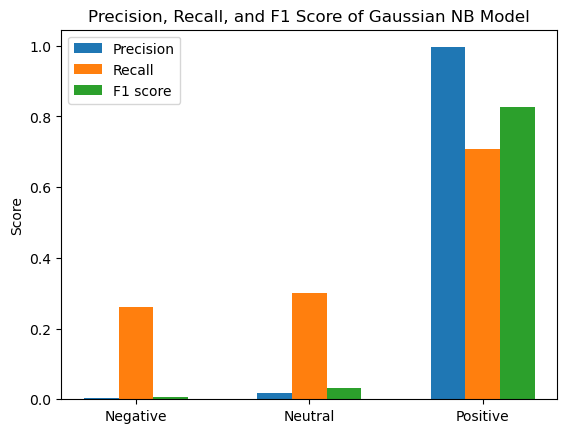

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, precision_score, recall_score, f1_score
import numpy as np

# Plot the precision, recall, and F1 score bar chart
labels = ['Negative', 'Neutral', 'Positive']
metrics = ['Precision', 'Recall', 'F1 score']
scores = [precision_score(y_test, y_pred_gnb, average=None), recall_score(y_test, y_pred_gnb, average=None), f1_score(y_test, y_pred_gnb, average=None)]

x = np.arange(len(labels))
width = 0.2

fig, ax = plt.subplots()
for i, metric in enumerate(metrics):
    ax.bar(x - width + i * width, scores[i], width, label=metric)

ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_ylabel('Score')
ax.set_title('Precision, Recall, and F1 Score of Gaussian NB Model')
ax.legend()
plt.show()

#  Performance Evaluation using Rnadom forest Algorithm

In [43]:
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest Classifier object with default hyperparameters
rfc = RandomForestClassifier()

# Fit the classifier on the training data
rfc.fit(X_train, y_train)

# Make predictions on the test data
y_pred_rfc = rfc.predict(X_test)


# Compute and print the accuracy score
accuracy_rfc = accuracy_score(y_test,y_pred_rfc)
print("Accuracy:", accuracy_rfc)

# Compute and print the confusion matrix
cm = confusion_matrix(y_test, y_pred_rfc)
print("Confusion Matrix:\n", cm)

# Compute and print the precision, recall, and f1 score for each class
print("Precision, Recall, and F1 Score:")
print(classification_report(y_test,y_pred_rfc,target_names=['Negative-0', 'Neutral-1', 'Positive-2']))

Accuracy: 0.9944452290166172
Confusion Matrix:
 [[    0     0    50]
 [    0     1    62]
 [    1     5 21124]]
Precision, Recall, and F1 Score:
              precision    recall  f1-score   support

  Negative-0       0.00      0.00      0.00        50
   Neutral-1       0.17      0.02      0.03        63
  Positive-2       0.99      1.00      1.00     21130

    accuracy                           0.99     21243
   macro avg       0.39      0.34      0.34     21243
weighted avg       0.99      0.99      0.99     21243



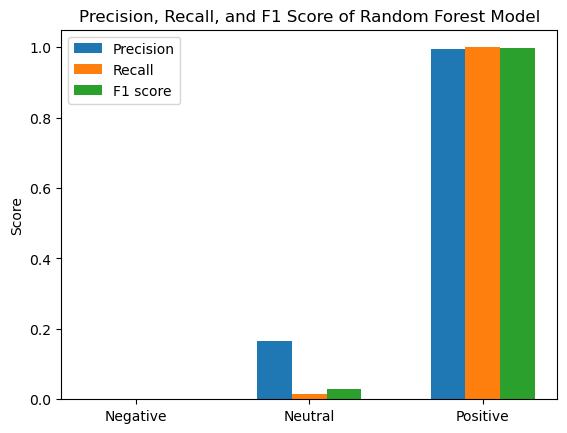

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, precision_score, recall_score, f1_score
import numpy as np

# Plot the precision, recall, and F1 score bar chart
labels = ['Negative', 'Neutral', 'Positive']
metrics = ['Precision', 'Recall', 'F1 score']
scores = [precision_score(y_test, y_pred_rfc, average=None), recall_score(y_test, y_pred_rfc, average=None), f1_score(y_test, y_pred_rfc, average=None)]

x = np.arange(len(labels))
width = 0.2

fig, ax = plt.subplots()
for i, metric in enumerate(metrics):
    ax.bar(x - width + i * width, scores[i], width, label=metric)

ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_ylabel('Score')
ax.set_title('Precision, Recall, and F1 Score of Random Forest Model')
ax.legend()
plt.show()

# Performance Evaluation using Decision tree Classifier

In [45]:
from sklearn.metrics import classification_report

# Define the new model to use
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()

# Fit the model on the training data
classifier.fit(X_train, y_train)

# Use the model to make predictions on the test data
y_pred_dt = classifier.predict(X_test)

# Calculate the accuracy of the model
accuracy_dt = accuracy_score(y_test, y_pred_dt)

# Print the accuracy of the model
print('Accuracy:', accuracy_dt)

# Compute and print the confusion matrix
cm = confusion_matrix(y_test, y_pred_dt)
print("Confusion Matrix:\n", cm)

# Print the classification report
report = classification_report(y_test, y_pred_dt, target_names=['Negative-0', 'Neutral-1', 'Positive-2'])
print("Precision, Recall, and F1 Score:")
print(report)

Accuracy: 0.9860189238808078
Confusion Matrix:
 [[    0     1    49]
 [    0     2    61]
 [   57   129 20944]]
Precision, Recall, and F1 Score:
              precision    recall  f1-score   support

  Negative-0       0.00      0.00      0.00        50
   Neutral-1       0.02      0.03      0.02        63
  Positive-2       0.99      0.99      0.99     21130

    accuracy                           0.99     21243
   macro avg       0.34      0.34      0.34     21243
weighted avg       0.99      0.99      0.99     21243



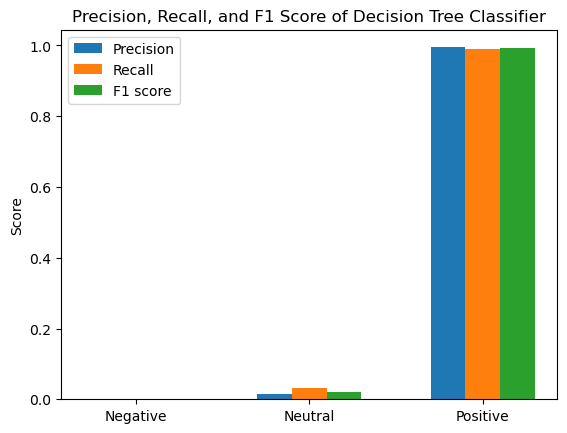

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, precision_score, recall_score, f1_score
import numpy as np

# Plot the precision, recall, and F1 score bar chart
labels = ['Negative', 'Neutral', 'Positive']
metrics = ['Precision', 'Recall', 'F1 score']
scores = [precision_score(y_test, y_pred_dt, average=None), recall_score(y_test, y_pred_dt, average=None), f1_score(y_test, y_pred_dt, average=None)]

x = np.arange(len(labels))
width = 0.2

fig, ax = plt.subplots()
for i, metric in enumerate(metrics):
    ax.bar(x - width + i * width, scores[i], width, label=metric)

ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_ylabel('Score')
ax.set_title('Precision, Recall, and F1 Score of Decision Tree Classifier')
ax.legend()
plt.show()

# Perfomance Comparison of three models

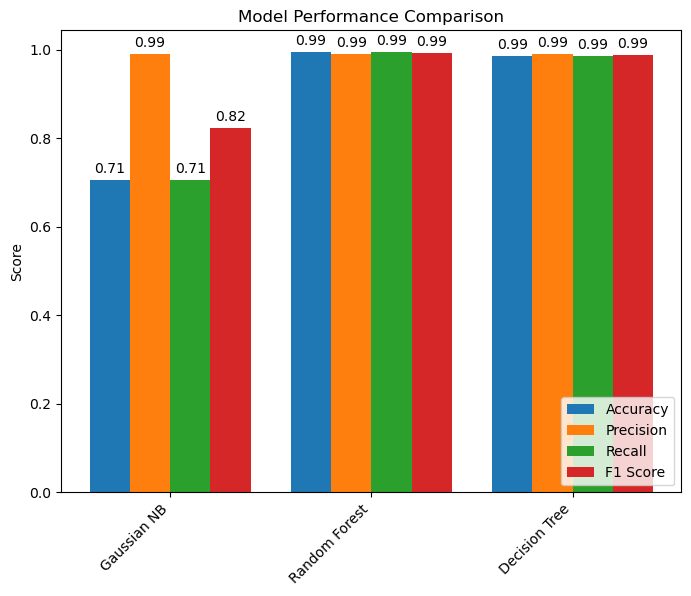

In [47]:
import matplotlib.pyplot as plt
import numpy as np

# Define the performance metrics
accuracy_scores = [accuracy_gnb, accuracy_rfc, accuracy_dt]
precision_scores = [precision_score(y_test, y_pred_gnb, average='weighted'), 
                    precision_score(y_test, y_pred_rfc, average='weighted'), 
                    precision_score(y_test, y_pred_dt, average='weighted')]
recall_scores = [recall_score(y_test, y_pred_gnb, average='weighted'), 
                 recall_score(y_test, y_pred_rfc, average='weighted'), 
                 recall_score(y_test, y_pred_dt, average='weighted')]
f1_scores = [f1_score(y_test, y_pred_gnb, average='weighted'), 
             f1_score(y_test, y_pred_rfc, average='weighted'), 
             f1_score(y_test, y_pred_dt, average='weighted')]

# Set the x-axis labels
models = ['Gaussian NB', 'Random Forest', 'Decision Tree']

# Define the bar chart settings
x_pos = np.arange(len(models))
width = 0.2

# Create the bar chart
fig, ax = plt.subplots(figsize=(8,6))
rects1 = ax.bar(x_pos - width, accuracy_scores, width, label='Accuracy')
rects2 = ax.bar(x_pos, precision_scores, width, label='Precision')
rects3 = ax.bar(x_pos + width, recall_scores, width, label='Recall')
rects4 = ax.bar(x_pos + 2*width, f1_scores, width, label='F1 Score')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Score')
ax.set_title('Model Performance Comparison')
ax.set_xticks(x_pos + width / 2)
ax.set_xticklabels(models)
ax.legend(loc='lower right')

# Rotate the x-axis labels if needed
plt.xticks(rotation=45, ha='right')

# Add the values above the bars
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:.2f}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)

plt.show()

# Implementation of XLNet

In [48]:
!pip install transformers
    

In [49]:
!pip install -q -U watermark

In [50]:
%reload_ext watermark
%watermark -v -p numpy,pandas,torch,transformers

Python implementation: CPython
Python version       : 3.11.5
IPython version      : 8.15.0

numpy       : 1.24.3
pandas      : 2.0.3
torch       : 2.1.1
transformers: 4.32.1



In [51]:
import transformers
from transformers import XLNetTokenizer, XLNetModel, AdamW, get_linear_schedule_with_warmup
import torch

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rc
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

from collections import defaultdict
from textwrap import wrap
from pylab import rcParams

from torch import nn, optim
from keras.preprocessing.sequence import pad_sequences
from torch.utils.data import TensorDataset,RandomSampler,SequentialSampler
from torch.utils.data import Dataset, DataLoader
import torch.nn.functional as F

In [52]:
%matplotlib inline
%config InlineBackend.figure_format='retina'

sns.set(style='whitegrid', palette='muted', font_scale=1.2)

HAPPY_COLORS_PALETTE = ["#01BEFE", "#FFDD00", "#FF7D00", "#FF006D", "#ADFF02", "#8F00FF"]

sns.set_palette(sns.color_palette(HAPPY_COLORS_PALETTE))

rcParams['figure.figsize'] = 12, 8

RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
torch.manual_seed(RANDOM_SEED)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cpu')

In [53]:
data2
data2.head()
     

,self_text,Sentiment
0,Actually my family has been in Israel for 600 ...,Neutral
1,Does anyone doubt that Iran WILL nuke Israel w...,Negative
2,Cool. Please stop massacring civilians.,Positive
3,the only ethnic cleansing that has ever take p...,Positive
4,I mean yeah it was fairly obvious Israel is ca...,Negative


In [54]:
from sklearn.utils import shuffle
df = shuffle(data2)
df.head(20)

,self_text,Sentiment
89024,I am *shocked* this shocks anyone. You will fi...,Negative
180308,What the fuck did i just read....? \n\n\nRes...,Negative
174587,I'd rather not go into the topographic demogra...,Neutral
120801,Hamduallah,Neutral
124974,Yep. [This article](https://mondoweiss.net/202...,Positive
221029,Get the story on the local news.,Neutral
201552,If your reaction to seeing a video of one side...,Negative
147123,[this](https://www.amnesty.org/en/latest/campa...,Neutral
211830,I know plenty of Muslims who don’t hate anyone...,Neutral
42509,So you think people were created? You do under...,Positive


In [55]:
df = df[:24000]
len(df)
     

24000

In [56]:
import re
def clean_text(text):
    text = re.sub(r"@[A-Za-z0-9]+", ' ', text)
    text = re.sub(r"https?://[A-Za-z0-9./]+", ' ', text)
    text = re.sub(r"[^a-zA-z.!?'0-9]", ' ', text)
    text = re.sub('\t', ' ',  text)
    text = re.sub(r" +", ' ', text)
    return text
     

In [57]:
df['self_text'] = df['self_text'].apply(clean_text)

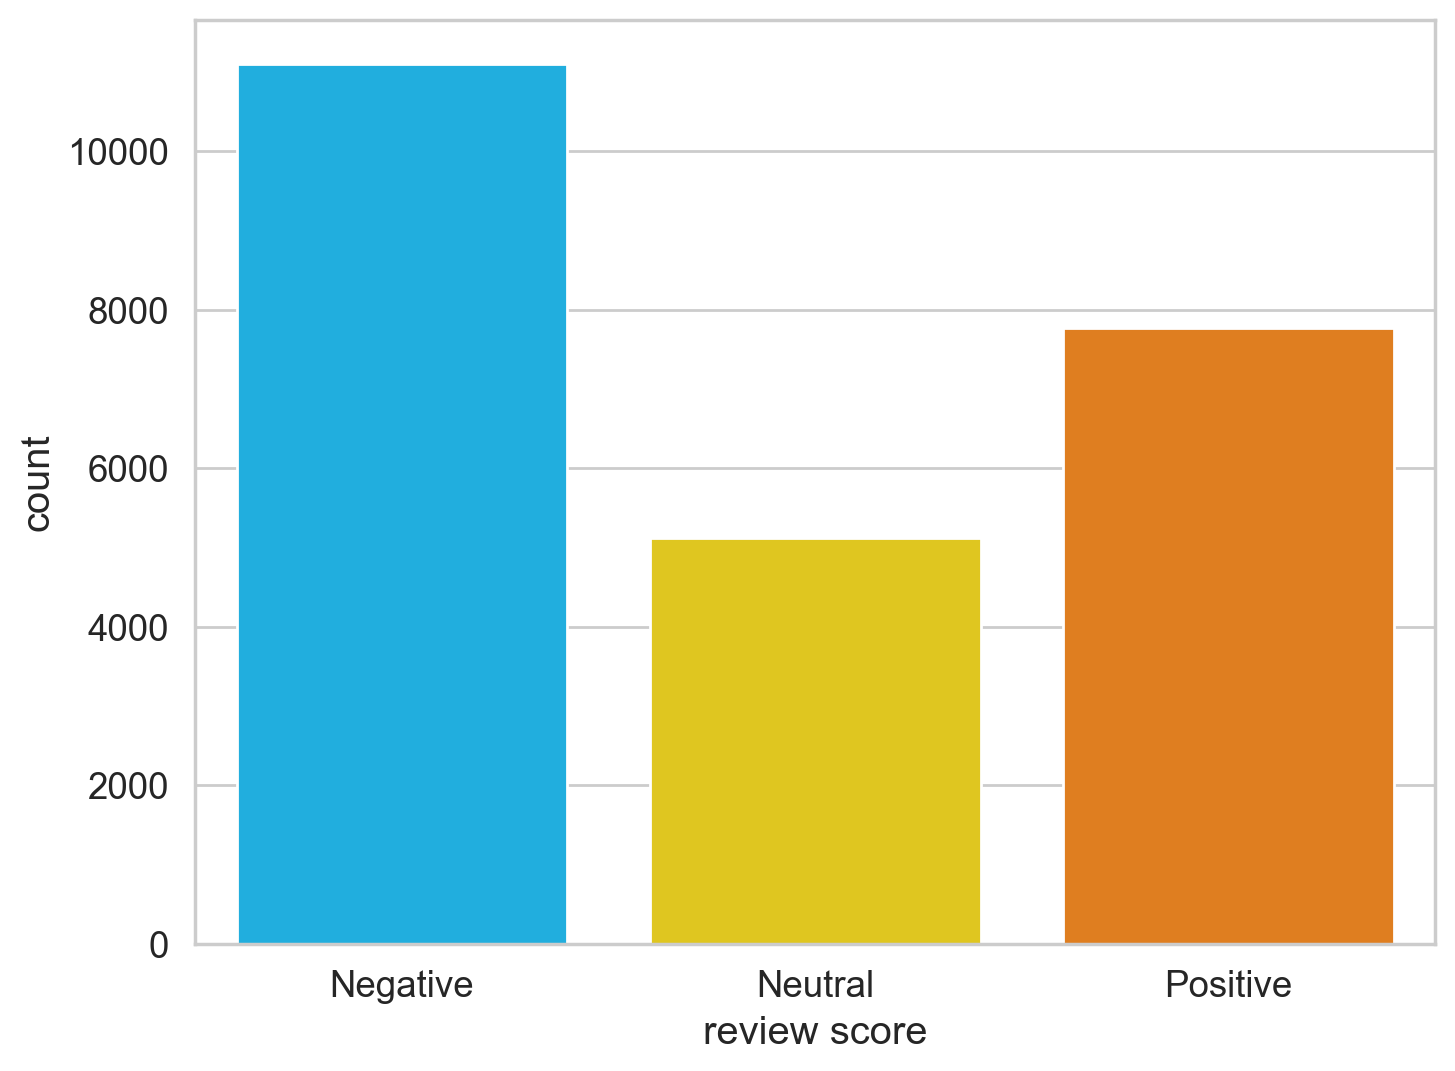

In [58]:
rcParams['figure.figsize'] = 8, 6
sns.countplot(x = 'Sentiment', data = df)
plt.xlabel('review score');
     

In [59]:
def sentiment2label(Sentiment):
    if Sentiment == "Positive":
        return 2
    if Sentiment == "Neutral": 
        return 1
    else :
        return 0

df['Sentiment'] = df['Sentiment'].apply(sentiment2label)

In [60]:
df['Sentiment'].value_counts()

Sentiment
0    11109
2     7774
1     5117
Name: count, dtype: int64

In [61]:
class_names = ['negative', 'positive', 'neutral']

# Playing with XLNetTokenizer

In [62]:
from transformers import XLNetTokenizer, XLNetModel
PRE_TRAINED_MODEL_NAME = 'xlnet-base-cased'
tokenizer = XLNetTokenizer.from_pretrained(PRE_TRAINED_MODEL_NAME)

# Checking the distribution of token lengths

In [63]:
token_lens = []

for txt in df['self_text']:
    tokens = tokenizer.encode(txt, max_length=512, truncation=True)
    token_lens.append(len(tokens))


/Users/Amisha/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


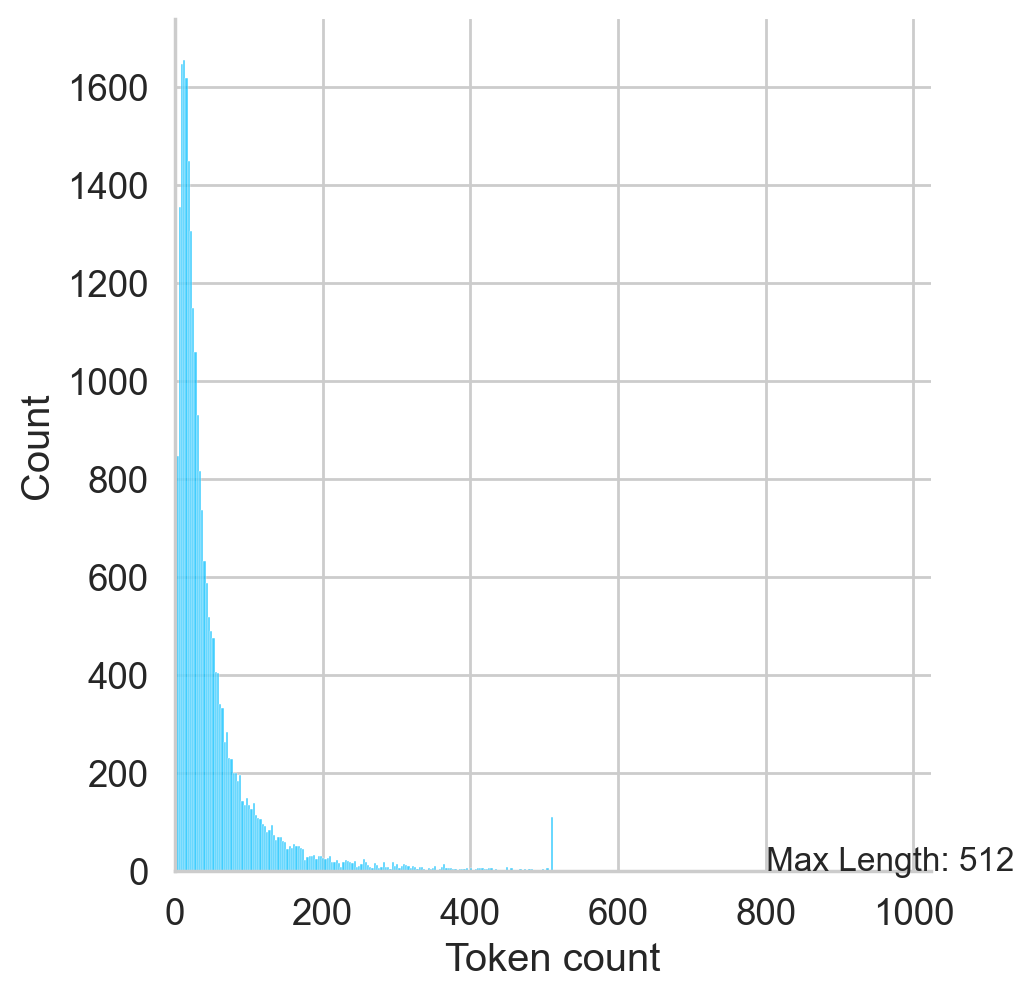

In [64]:
# Set the figure size
plt.rcParams['figure.figsize'] = (8, 6)

# Create a displot
sns.displot(token_lens)

# Set x-axis limit
plt.xlim([0, 1024])

# Set labels
plt.xlabel('Token count')

# Find and display the maximum token length
max_token_length = max(token_lens)
plt.text(800, 50, f'Max Length: {max_token_length}', fontsize=12, verticalalignment='top')

# Show the plot
plt.show()


In [65]:
MAX_LEN = 512

# Custom Dataset class

In [66]:
class War(Dataset):

    def __init__(self, reviews, targets, tokenizer, max_len):
        self.reviews = reviews
        self.targets = targets
        self.tokenizer = tokenizer
        self.max_len = max_len
    
    def __len__(self):
        return len(self.reviews)
    
    def __getitem__(self, item):
        review = str(self.reviews[item])
        target = self.targets[item]

        encoding = self.tokenizer.encode_plus(
        self_text,
        add_special_tokens=True,
        max_length=self.max_len,
        return_token_type_ids=False,
        pad_to_max_length=False,
        return_attention_mask=True,
        return_tensors='pt',
        )

        input_ids = pad_sequences(encoding['input_ids'], maxlen=MAX_LEN, dtype=torch.Tensor ,truncating="post",padding="post")
        input_ids = input_ids.astype(dtype = 'int64')
        input_ids = torch.tensor(input_ids) 

        attention_mask = pad_sequences(encoding['attention_mask'], maxlen=MAX_LEN, dtype=torch.Tensor ,truncating="post",padding="post")
        attention_mask = attention_mask.astype(dtype = 'int64')
        attention_mask = torch.tensor(attention_mask)       

        return {
        'review_text': self_text,
        'input_ids': input_ids,
        'attention_mask': attention_mask.flatten(),
        'targets': torch.tensor(target, dtype=torch.long)
        }

In [67]:
df_train, df_test = train_test_split(df, test_size=0.5, random_state=101)
df_val, df_test = train_test_split(df_test, test_size=0.5, random_state=101)

In [68]:
df_train.shape, df_val.shape, df_test.shape

((12000, 2), (6000, 2), (6000, 2))